In [81]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point

sns.set_style('whitegrid')


In [82]:
pd.set_option('display.max_columns', 500)

In [83]:
df = pd.read_csv('order_data.csv')

<ipython-input-83-fdcdb3c26136>:1: DtypeWarning:

Columns (1,28) have mixed types. Specify dtype option on import or set low_memory=False.



In [84]:
df

,amazon-order-id,merchant-order-id,purchase-date,last-updated-date,order-status,fulfillment-channel,sales-channel,order-channel,url,ship-service-level,product-name,sku,asin,item-status,quantity,currency,item-price,item-tax,shipping-price,shipping-tax,gift-wrap-price,gift-wrap-tax,item-promotion-discount,ship-promotion-discount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,is-business-order,purchase-order-number,price-designation,fulfilled-by,is-iba
0,408-9305785-9933137,NaN,2022-06-30T07:47:34+00:00,2022-07-05T13:46:58+00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,"CASSARINA Measuring Seasoning Bottle,Salt Pepp...",salt glass bottle,B0B4WQFHSY,Shipped,1,INR,379.0,18.05,NaN,NaN,NaN,NaN,NaN,NaN,Hyderabad,TELANGANA,500089.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,NaN,NaN,Easy Ship,False
1,171-9298716-0876366,NaN,2022-06-30T06:29:38+00:00,2022-07-03T05:34:10+00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,CASSARINA Make Up Room and Bathroom Mirror Stu...,studio_light,B0B54W246R,Shipped,1,INR,349.0,16.62,NaN,NaN,NaN,NaN,NaN,NaN,New Delhi,DELHI,110016.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,NaN,NaN,Easy Ship,False
2,171-0938003-1465904,NaN,2022-06-29T09:37:46+00:00,2022-07-03T08:36:37+00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,CASSARINA Stainless Steel Adjustable Slicer wi...,5B-NUK1-KRCF,B0B567FKSH,Shipped,1,INR,999.0,47.57,NaN,NaN,NaN,NaN,NaN,NaN,CHIPLUN,MAHARASHTRA,415605.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,NaN,NaN,Easy Ship,False
3,406-2849523-1529923,NaN,2022-06-29T09:26:55+00:00,2022-07-05T06:27:43+00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,CASSARINA Plastic Bird Toothpick Dispenser Aut...,bird tooth picker,B0B4VTTX1Y,Shipped,1,INR,399.0,19.00,NaN,NaN,NaN,NaN,NaN,NaN,MANDAPETA,ANDHRA PRADESH,533308.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,NaN,NaN,Easy Ship,False
4,403-4760321-2356327,NaN,2022-06-29T09:16:39+00:00,2022-07-01T17:21:39+00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,NextDay,"CASSARINA Measuring Seasoning Bottle,Salt Pepp...",salt glass bottle,B0B4WQFHSY,Shipped,1,INR,379.0,18.05,NaN,NaN,NaN,NaN,NaN,NaN,MUMBAI,MAHARASHTRA,400026.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,NaN,NaN,Easy Ship,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28542,404-4470318-5196308,NaN,2024-03-31T20:04:36+00:00,2024-04-01T01:12:38+00:00,Cancelled,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,Cassarina Stainless Steel Six Speed Manual Tra...,1 gearkeychain,B0BWNP9XFV,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harchowal,PUNJAB,143527.0,IN,NaN,False,NaN,NaN,Easy Ship,False
28543,403-5454463-8568356,NaN,2024-03-31T19:50:02+00:00,2024-04-06T09:42:29+00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,Cassarina New 3D Notebook Kawaii Mymelody Cinn...,3D Book ( Mahant ),B0CR913QGQ,Shipped,1,INR,299.0,14.24,NaN,NaN,NaN,NaN,NaN,NaN,KOLKATA,WEST BENGAL,700018.0,IN,NaN,False,NaN,NaN,Easy Ship,False
28544,408-2318554-1742728,NaN,2024-03-31T19:24:24+00:00,2024-04-04T06:20:40+00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,Cassarina Cloud Series Plastic Cutlery Holder ...,GU-8DAQ-KR2H,B0C27Q9DMG,Shipped,1,INR,399.0,19.00,NaN,NaN,NaN,NaN,NaN,NaN,Thane,MAHARASHTRA,400612.0,IN,NaN,False,NaN,NaN,Easy Ship,False
28545,408-8550874-8972353,NaN,2024-03-31T19:02:08+00:00,2024-04-06T04:01:55+00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,CASSARINA Car Seat Gap Filler Organizer Storag...,Car gap filler,B0CKPKD4JK,Shipped,2,INR,858.0,40.86,NaN,NaN,NaN,NaN,NaN,NaN,PIMPRI CHINCHWAD,MAHARASHTRA,411026.0,IN,NaN,True,NaN,Business Price,Ea

<Axes: >

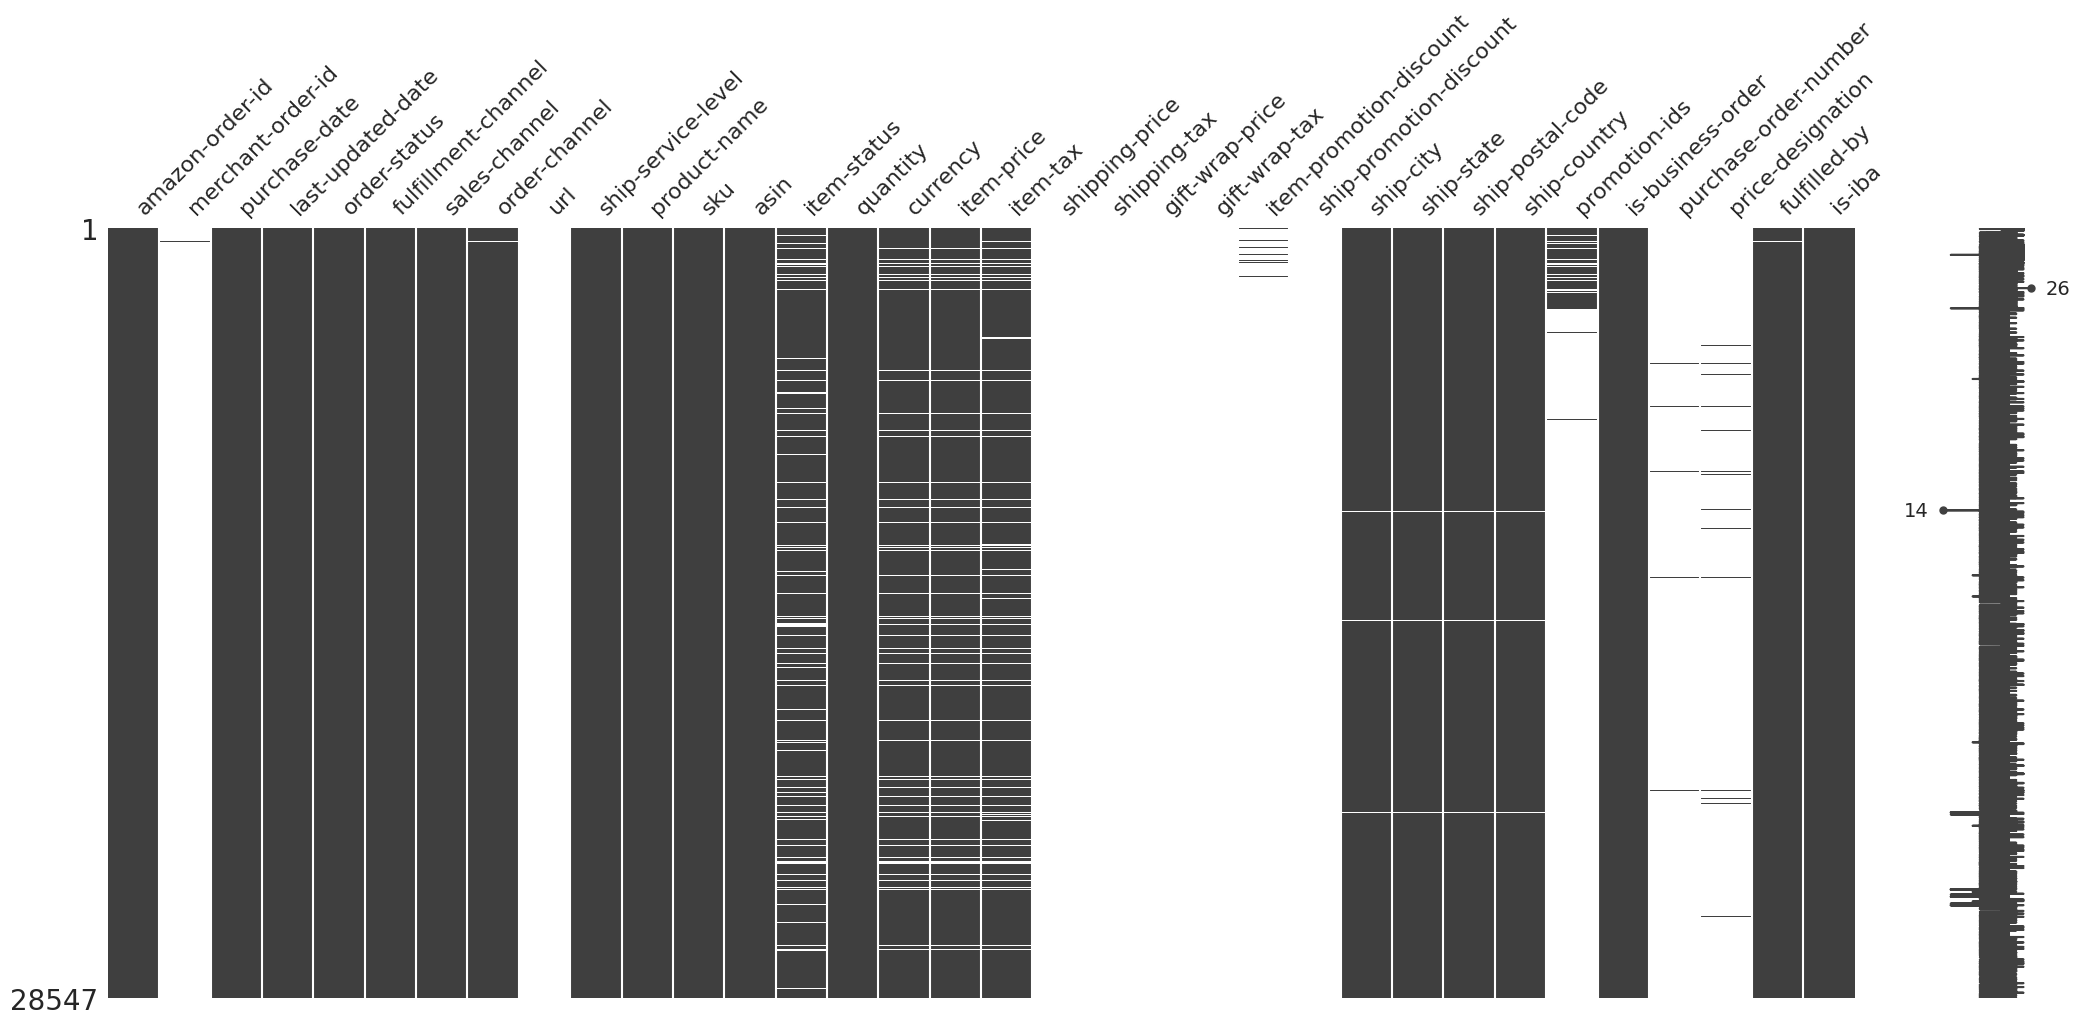

In [85]:
msno.matrix(df)

In [86]:
df['merchant-order-id'].unique()

array([nan, 'Xm8sdbK694', '171-6758269-4544353', '402-0500992-6145101',
       '406-4144658-3254763', '408-2429366-4020306',
       '171-1104578-1360309', '404-7196681-1200320',
       '406-0688368-7857903', '406-1837980-6980361',
       '405-7195005-8015507', '408-0582917-7655557',
       '171-8023625-0245927', '402-1204216-8424307',
       '402-2449025-4212340', '408-9388403-4895509',
       '406-3844465-7486721', '402-2377725-8089934',
       '408-6159716-5034700', '408-1844455-8626763',
       '407-2177036-0025931', '406-4367152-5467543',
       '404-1269980-4856310', '405-6829135-1935534',
       '408-4617714-3811565', '403-5396679-7517927',
       '407-8846519-1519539', '402-6950234-8293918',
       '406-1321961-0706738', '407-6169000-8777918',
       '171-2377949-6165914', '404-3526752-0910707',
       '404-4707143-2982726', '404-6016896-4010746',
       '402-8933754-8494754', '405-2556593-7394739',
       '407-9610802-6279528', '402-9788396-5661105',
       '404-0861534-6369159

In [87]:
import pandas as pd

unique_order_ids = df['merchant-order-id'].unique()

# Initialize an empty list to store DataFrames
unique_df_list = []

# Iterate through unique order IDs
for order_id in unique_order_ids:
    # Filter the DataFrame to include only the rows where 'merchant-order-id' matches the current unique value
    unique_rows = df[df['merchant-order-id'] == order_id]

    # Append the filtered DataFrame to the list
    unique_df_list.append(unique_rows)

# Concatenate the list of DataFrames into a single DataFrame
unique_df = pd.concat(unique_df_list)


In [88]:
unique_df

,amazon-order-id,merchant-order-id,purchase-date,last-updated-date,order-status,fulfillment-channel,sales-channel,order-channel,url,ship-service-level,product-name,sku,asin,item-status,quantity,currency,item-price,item-tax,shipping-price,shipping-tax,gift-wrap-price,gift-wrap-tax,item-promotion-discount,ship-promotion-discount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,is-business-order,purchase-order-number,price-designation,fulfilled-by,is-iba
270,S02-4783525-7494506,Xm8sdbK694,2022-08-28T13:12:04+00:00,2022-09-01T06:35:53+00:00,Shipped,Amazon,Non-Amazon,NaN,NaN,Standard,-,FBA-STUDIO LIGHT,B0B54W246R,Unshipped,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Surat,Gujarat,395004.0,IN,NaN,False,NaN,NaN,NaN,False
282,171-6758269-4544353,171-6758269-4544353,2022-08-25T10:09:59+00:00,2022-08-25T15:37:20+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,PRIVATECAVETM Make Up Room and Bathroom Mirror...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,1,INR,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PUNE,MAHARASHTRA,411014.0,IN,NaN,False,NaN,NaN,NaN,False
285,402-0500992-6145101,402-0500992-6145101,2022-08-24T12:03:11+00:00,2022-08-25T04:15:20+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,PRIVATECAVETM Make Up Room and Bathroom Mirror...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,1,INR,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miyapur Hyderabad,TELANGANA,500049.0,IN,NaN,False,NaN,NaN,NaN,False
286,406-4144658-3254763,406-4144658-3254763,2022-08-24T10:57:18+00:00,2022-08-24T16:07:33+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,PRIVATECAVETM Make Up Room and Bathroom Mirror...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,2,INR,798.0,NaN,80.0,NaN,NaN,NaN,NaN,80.0,MANGALORE,KARNATAKA,575001.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,NaN,False
290,408-2429366-4020306,408-2429366-4020306,2022-08-23T06:07:30+00:00,2022-08-23T09:40:19+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,PRIVATECAVETM Make Up Room and Bathroom Mirror...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,1,INR,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JAMMU,JAMMU & KASHMIR,180001.0,IN,NaN,False,NaN,NaN,NaN,False
458,171-1104578-1360309,171-1104578-1360309,2022-08-14T09:26:31+00:00,2022-08-14T15:26:17+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,CASSARINA Make Up Room and Bathroom Mirror Stu...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,1,INR,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEW DELHI,DELHI,110092.0,IN,NaN,False,NaN,NaN,NaN,False
459,404-7196681-1200320,404-7196681-1200320,2022-08-14T09:24:21+00:00,2022-08-15T09:33:57+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,CASSARINA Make Up Room and Bathroom Mirror Stu...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,1,INR,349.0,NaN,40.0,NaN,NaN,NaN,NaN,40.0,JAMMU,JAMMU & KASHMIR,180001.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,NaN,False
460,406-0688368-7857903,406-0688368-7857903,2022-08-14T09:14:32+00:00,2022-08-14T16:07:30+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,CASSARINA Make Up Room and Bathroom Mirror Stu...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,2,INR,698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENGALURU,KARNATAKA,560008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,NaN,False
461,406-1837980-6980361,406-1837980-6980361,2022-08-14T08:44:46+00:00,2022-08-14T22:43:21+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,CASSARINA Make Up Room and Bathroom Mirror Stu...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,1,INR,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New delhi,DELHI,110023.0,IN,NaN,False,NaN,NaN,NaN,False
462,405-7195005-8015507,405-7195005-8015507,2022-08-14T08:08:23+00:00,2022-08-14T22:30:56+00:00,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,CASSARINA Make Up Room and Bathroom Mirror Stu...,FBA-STUDIO LIGHT,B0B54W246R,Shipped,1,INR,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEW DELHI,DELHI,110085.0,IN,NaN,False,NaN,NaN,NaN,False


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28547 entries, 0 to 28546
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amazon-order-id          28547 non-null  object 
 1   merchant-order-id        51 non-null     object 
 2   purchase-date            28547 non-null  object 
 3   last-updated-date        28547 non-null  object 
 4   order-status             28547 non-null  object 
 5   fulfillment-channel      28547 non-null  object 
 6   sales-channel            28547 non-null  object 
 7   order-channel            28496 non-null  object 
 8   url                      0 non-null      float64
 9   ship-service-level       28547 non-null  object 
 10  product-name             28547 non-null  object 
 11  sku                      28547 non-null  object 
 12  asin                     28547 non-null  object 
 13  item-status              25962 non-null  object 
 14  quantity              

In [90]:
df.describe()

,url,quantity,item-price,item-tax,shipping-price,shipping-tax,gift-wrap-price,gift-wrap-tax,item-promotion-discount,ship-promotion-discount,ship-postal-code
count,0.0,28547.000000,26469.000000,26016.000000,38.000000,26.000000,0.0,0.0,100.000000,9.000000,28457.000000
mean,NaN,0.983361,426.016457,21.541147,68.421053,3.808462,NaN,NaN,15.326000,44.444444,451781.514917
std,NaN,0.611352,360.994346,19.661342,18.384235,0.003679,NaN,NaN,4.962329,13.333333,192626.603865
min,NaN,0.000000,0.000000,4.420000,40.000000,3.800000,NaN,NaN,8.540000,40.000000,110001.000000
25%,NaN,1.000000,299.000000,14.240000,40.000000,3.810000,NaN,NaN,11.390000,40.000000,360575.000000
50%,NaN,1.000000,349.000000,16.620000,80.000000,3.810000,NaN,NaN,14.240000,40.000000,458441.000000
75%,NaN,1.000000,449.000000,23.240000,80.000000,3.810000,NaN,NaN,19.000000,40.000000,584128.000000
max,NaN,30.000000,17114.400000,912.200000,80.000000,3.810000,NaN,NaN,33.290000,80.000000,855107.000000


In [91]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Combine the two DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Display the combined DataFrame
print(combined_df)

                    Feature  Unique Values  Missing Values
0           amazon-order-id          28270               0
1         merchant-order-id             51           28496
2             purchase-date          28245               0
3         last-updated-date          27442               0
4              order-status              9               0
5       fulfillment-channel              2               0
6             sales-channel              2               0
7             order-channel              1              51
8                       url              0           28547
9        ship-service-level              4               0
10             product-name           1090               0
11                      sku            905               0
12                     asin            895               0
13              item-status              3            2585
14                 quantity             16               0
15                 currency              1            20

In [92]:
# Group by quantity and count the occurrences
quantity_counts = df['quantity'].value_counts().reset_index()
quantity_counts.columns = ['Quantity', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(quantity_counts, x='Quantity', y='Count',
             text_auto='.2s',
             text='Quantity',
             title='Total Counts by Quantity',
             color='Quantity',
             labels={'Quantity': 'Quantity', 'Count': 'Count'}, height=600)


fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


# Show the plot
fig.show()

In [93]:
# Group by ship-service-level and count the occurrences
ship_service_counts = df['ship-service-level'].value_counts().reset_index()
ship_service_counts.columns = ['Ship Service Level', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(ship_service_counts, x='Ship Service Level', y='Count',
             text_auto='.2s',
             text='Count',
             title='Total Counts by Ship Service Level',
             color='Ship Service Level',
             labels={'Ship Service Level': 'Ship Service Level', 'Count': 'Count'}, height=600)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

# Show the plot
fig.show()


In [94]:
# Group by sales-channel and count the occurrences
sales_channel_counts = df['sales-channel'].value_counts().reset_index()
sales_channel_counts.columns = ['Sales Channel', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(sales_channel_counts, x='Sales Channel', y='Count',
             text_auto='.2s',
             text='Count',
             title='Total Counts by Sales Channel',
             color='Sales Channel',
             labels={'Sales Channel': 'Sales Channel', 'Count': 'Count'}, height=600)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

# Show the plot
fig.show()


In [95]:
# Group by is-business-order and count the occurrences
business_order_counts = df['is-business-order'].value_counts().reset_index()
business_order_counts.columns = ['Is Business Order', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(business_order_counts, x='Is Business Order', y='Count',
             text_auto='.2s',
             text='Count',
             title='Total Counts by Business Order',
             color='Is Business Order',
             labels={'Is Business Order': 'Is Business Order', 'Count': 'Count'}, height=600)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

# Show the plot
fig.show()


In [96]:
import pandas as pd
import plotly.express as px

# Group by 'asin' and count the occurrences
asin_counts = df['asin'].value_counts().reset_index()
asin_counts.columns = ['asin', 'Count']

# Create scatter plot using Plotly Express
fig = px.scatter(asin_counts, x='asin', y='Count',
                 title='Total Counts for Each ASIN',
                 labels={'asin': 'ASIN', 'Count': 'Count'})

# Show the plot
fig.show()


In [100]:
# Convert 'purchase-date' to datetime
df['purchase-date'] = pd.to_datetime(df['purchase-date'])

# Extract month from 'purchase-date'
df['purchase-month'] = df['purchase-date'].dt.year

# Group by 'purchase-month' and 'asin' and count the occurrences
purchase_asin_counts = df.groupby(['purchase-month', 'asin']).size().reset_index(name='Count')

# Create line charts using Plotly Express
fig = px.line(purchase_asin_counts, x='purchase-month', y='Count', color='asin',
              title='Purchase Counts by Month and ASIN',
              labels={'purchase-month': 'Month', 'Count': 'Count', 'asin': 'ASIN'})

# Show the plot
fig.show()